In [1]:
%load_ext autoreload
%autoreload 2
from pyha_analyzer import AudioDataset, PyhaTrainer, extractors

# Loading in Data

In [4]:
peru132_extr = extractors.Peru132Extractor()
peru_132_ads = peru132_extr("/data/XC_wav")

Resolving data files:   0%|          | 0/45547 [00:00<?, ?it/s]

In [5]:
peru_132_ads = peru_132_ads.get_provenance()

AttributeError: 'AudioDataset' object has no attribute 'get_provenance'

In [2]:
birdset_extactor = extractors.Birdset()

hsn_ads = birdset_extactor("HSN")
# per_ads = birdset_extactor("PER")

hsn_ads

Extracting train split:   0%|          | 0/7 [00:00<?, ?it/s]

Extracting test split:   0%|          | 0/3 [00:00<?, ?it/s]

Extracting test_5s split:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating test_5s split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel'],
        num_rows: 4368
    })
    valid: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel'],
        num_rows: 1092
    })
    test: Dataset({
        features: ['au

In [3]:
type(hsn_ads)

pyha_analyzer.dataset.AudioDataset

In [7]:
hsn_ads["test"][0]

{'audio': {'bytes': None,
  'path': '/home/tzhang04/.cache/huggingface/hub/datasets--DBD-research-group--BirdSet/snapshots/ee31c6ba7dd653e57bf327bdd0c1bde6b0334bba/HSN/extracted/HSN_test5s_shard_0001.tar.gz/HSN_011_20150709_075805_575_580.ogg'},
 'filepath': '/home/tzhang04/.cache/huggingface/hub/datasets--DBD-research-group--BirdSet/snapshots/ee31c6ba7dd653e57bf327bdd0c1bde6b0334bba/HSN/extracted/HSN_test5s_shard_0001.tar.gz/HSN_011_20150709_075805_575_580.ogg',
 'start_time': 0.0,
 'end_time': 5.0,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': None,
 'ebird_code_multilabel': [],
 'ebird_code_secondary': None,
 'call_type': None,
 'sex': None,
 'lat': 37.0,
 'long': -118.5,
 'length': None,
 'microphone': 'Soundscape',
 'license': 'Creative Commons Attribution 4.0 International Public License',
 'source': 'https://zenodo.org/record/7525805',
 'local_time': '8:16:06',
 'detected_events': None,
 'event_cluster': None,
 'peaks': None,
 'quality': None,
 'recordist': None,
 'genus

# Online Preprocessing example

Suppose we just wanted spectrograms with no audio preprocessing

In [6]:
hsn_ads["test"][0]["audio"]

{'bytes': None,
 'path': '/home/tzhang04/.cache/huggingface/hub/datasets--DBD-research-group--BirdSet/snapshots/ee31c6ba7dd653e57bf327bdd0c1bde6b0334bba/HSN/extracted/HSN_test5s_shard_0001.tar.gz/HSN_011_20150709_075805_575_580.ogg'}

In [6]:
hsn_ads

DatasetDict({
    train: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel'],
        num_rows: 4368
    })
    valid: Dataset({
        features: ['audio', 'filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary', 'call_type', 'sex', 'lat', 'long', 'length', 'microphone', 'license', 'source', 'local_time', 'detected_events', 'event_cluster', 'peaks', 'quality', 'recordist', 'genus', 'species_group', 'order', 'genus_multilabel', 'species_group_multilabel', 'order_multilabel'],
        num_rows: 1092
    })
    test: Dataset({
        features: ['au

In [7]:
import librosa
import numpy as np
import torchvision.transforms as transforms

#Perhaps this lives in its own folder? We should define transforms somewhere nice
def create_mel_spectrogram_transform(item):
    print(item)
    y, sr = librosa.load(path=item["audio"][0]["path"])
    print(librosa.feature.melspectrogram(y=y, sr=sr).shape)
    pillow_transforms = transforms.ToPILImage()
    item["input"] = [pillow_transforms(librosa.feature.melspectrogram(y=y, sr=sr))]
    return item

hsn_ads.set_transform(create_mel_spectrogram_transform)
hsn_ads["train"][0]

{'audio': [{'bytes': None, 'path': '/home/s.perry.543/.cache/huggingface/datasets/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/XC792210.ogg'}], 'filepath': ['/home/s.perry.543/.cache/huggingface/datasets/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/XC792210.ogg'], 'start_time': [None], 'end_time': [None], 'low_freq': [None], 'high_freq': [None], 'ebird_code': [20], 'ebird_code_multilabel': [[20]], 'ebird_code_secondary': [['rewbla', 'norcar']], 'call_type': ['song'], 'sex': ['male'], 'lat': [42.0367], 'long': [-79.414], 'length': [103], 'microphone': ['focal'], 'license': ['//creativecommons.org/licenses/by-nc-sa/4.0/'], 'source': ['xenocanto'], 'local_time': ['09:30'], 'detected_events': [[[2.144, 5.536], [2.624, 5.312], [8.976, 12.656], [10.368, 12.08], [13.28, 17.52], [16.608, 17.12], [18.384, 21.584], [19.088, 20.624], [24.544, 29.344], [25.872, 27.856], [31.408, 32.8], [33.504, 38.032], [43.456, 48.192

{'audio': {'bytes': None,
  'path': '/home/s.perry.543/.cache/huggingface/datasets/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/XC792210.ogg'},
 'filepath': '/home/s.perry.543/.cache/huggingface/datasets/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/XC792210.ogg',
 'start_time': None,
 'end_time': None,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': 20,
 'ebird_code_multilabel': [20],
 'ebird_code_secondary': ['rewbla', 'norcar'],
 'call_type': 'song',
 'sex': 'male',
 'lat': 42.0367,
 'long': -79.414,
 'length': 103,
 'microphone': 'focal',
 'license': '//creativecommons.org/licenses/by-nc-sa/4.0/',
 'source': 'xenocanto',
 'local_time': '09:30',
 'detected_events': [[2.144, 5.536],
  [2.624, 5.312],
  [8.976, 12.656],
  [10.368, 12.08],
  [13.28, 17.52],
  [16.608, 17.12],
  [18.384, 21.584],
  [19.088, 20.624],
  [24.544, 29.344],
  [25.872, 27.856],
  [31.408, 32.8],
  [33.504, 38.032],
  [43.456,

{'audio': [{'bytes': None, 'path': '/home/s.perry.543/.cache/huggingface/datasets/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/XC792210.ogg'}], 'filepath': ['/home/s.perry.543/.cache/huggingface/datasets/downloads/extracted/e8d87da059276237fe3a09f216dfe50ac2186afa53bf9c3b9e14c93979cbeba4/XC792210.ogg'], 'start_time': [None], 'end_time': [None], 'low_freq': [None], 'high_freq': [None], 'ebird_code': [20], 'ebird_code_multilabel': [[20]], 'ebird_code_secondary': [['rewbla', 'norcar']], 'call_type': ['song'], 'sex': ['male'], 'lat': [42.0367], 'long': [-79.414], 'length': [103], 'microphone': ['focal'], 'license': ['//creativecommons.org/licenses/by-nc-sa/4.0/'], 'source': ['xenocanto'], 'local_time': ['09:30'], 'detected_events': [[[2.144, 5.536], [2.624, 5.312], [8.976, 12.656], [10.368, 12.08], [13.28, 17.52], [16.608, 17.12], [18.384, 21.584], [19.088, 20.624], [24.544, 29.344], [25.872, 27.856], [31.408, 32.8], [33.504, 38.032], [43.456, 48.192

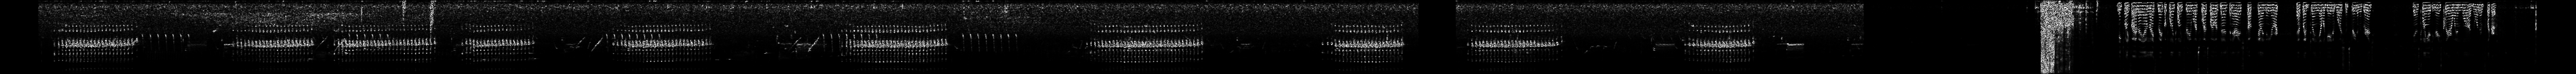

In [8]:
print(np.array(hsn_ads["train"][0]["input"]).shape)
hsn_ads["train"][0]["input"]

# Model Training

As a demo, implementing a model here because we haven't fleshed out the AudioDataset api yet

In the future this exists in `/pyha_analyzer/models/`

In [9]:
from pyha_analyzer.models.demo_CNN import ResnetConfig, ResnetModel
import torch
                                #Going to make notes on anything that should be handled not here
                                # This is one of these things, this should be handled by potentially pyha_trainer
resnet50d_config = ResnetConfig(num_classes=len(hsn_ads["train"].features["ebird_code"].names), input_channels=1)
model = ResnetModel(resnet50d_config)

In [11]:
trainer = PyhaTrainer(
    model=model,
    training_args=None,
    dataset=hsn_ads,
)
trainer.train()

ValueError: No columns in the dataset match the model's forward method signature. The following columns have been ignored: [ebird_code_multilabel, order_multilabel, license, audio, recordist, high_freq, long, end_time, start_time, length, source, low_freq, peaks, lat, sex, species_group, filepath, call_type, genus_multilabel, microphone, ebird_code_secondary, event_cluster, detected_events, genus, order, ebird_code, quality, species_group_multilabel, local_time]. Please check the dataset and model. You may need to set `remove_unused_columns=False` in `TrainingArguments`.

#